In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm # OLS module for linear regression
from ising import *
from graph_utils import *

/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_2856/3208849690.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Ising on Barabasi - Albert Networks

## At fixed temperature

Preliminary step necessary to undersand how many equilibration steps are needed

- snapshots of the evolution
- plots of energy and magnetization relaxation

In [2]:
num_nodes = 400
m = 1
mean_field_temperature = (m / 2) * np.log(num_nodes)
G = nx.barabasi_albert_graph(num_nodes, m)
a = get_dense_adj_matrix(G)

In [17]:
chosen_temp = 0.6* mean_field_temperature
n_step = 200
initial_state, final_state, df = simulate_ising_fixed_temp(adjacency_matrix= a, T = chosen_temp, num_steps= n_step)
df.to_csv(f"BA_results_num_nodes_{num_nodes}_temp_{chosen_temp:.2f}.csv")

step number 0
step number 50
step number 100
step number 150


In [18]:
### Energy and Magnetization 
df = pd.read_csv("outputs_csv/BA_results_num_nodes_400_temp_1.80.csv")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 3, ncols= 2, figsize = (7,9))
plt.subplots_adjust(hspace= 0.4, wspace = 0.4)
ax1.plot(df['n_step'], df['average_magnetization'])
ax1.set_xlabel("time step")
ax1.set_ylabel("magnetization")
ax1.grid()
ax2.plot(df['n_step'], df['energy'])
ax2.set_xlabel("time step")
ax2.set_ylabel(r"energy E")
ax2.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label='T = 1.13')
ax2.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

df = pd.read_csv("outputs_csv/BA_results_num_nodes_400_temp_3.00.csv")
ax3.plot(df['n_step'], df['average_magnetization'])
ax3.set_xlabel("time step")
ax3.set_ylabel("magnetization")
ax3.grid()
ax4.plot(df['n_step'], df['energy'])
ax4.set_xlabel("time step")
ax4.set_ylabel(r"energy E")
ax4.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label='T = 2.27')
ax4.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

df = pd.read_csv("outputs_csv/BA_results_num_nodes_400_temp_8.99.csv")
ax5.plot(df['n_step'].iloc[0:1000], df['average_magnetization'].iloc[0:1000])
ax5.set_xlabel("time step")
ax5.set_ylabel("magnetization")
ax5.grid()
ax6.plot(df['n_step'].iloc[0:1000], df['energy'].iloc[0:1000])
ax6.set_xlabel("time step")
ax6.set_ylabel(r"energy E")
ax6.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label='T = 5.0')
ax6.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

plt.savefig("figures/BA_relaxation.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'outputs_csv/BA_results_num_nodes_400_temp_1.80.csv'

In [50]:
print(theoretical_critical_temperature)

2.269185314213022


## With temperature scaling

In [112]:
n_linear = 20
N = n_linear ** 2
G = create_square_lattice(n_linear)
a = get_dense_adj_matrix(G)
T_i = 1
T_f = 7
t_points = 50
df = simulate_ising(a, T_i, T_f, t_points=t_points, equilibration_steps=500, sweep_steps=500)

temperature 1.0, point 0/50
temperature 1.1224489795918366, point 1/50
temperature 1.2448979591836735, point 2/50
temperature 1.3673469387755102, point 3/50
temperature 1.489795918367347, point 4/50
temperature 1.6122448979591837, point 5/50
temperature 1.7346938775510203, point 6/50
temperature 1.8571428571428572, point 7/50
temperature 1.9795918367346939, point 8/50
temperature 2.1020408163265305, point 9/50
temperature 2.2244897959183674, point 10/50
temperature 2.3469387755102042, point 11/50
temperature 2.4693877551020407, point 12/50
temperature 2.5918367346938775, point 13/50
temperature 2.7142857142857144, point 14/50
temperature 2.836734693877551, point 15/50
temperature 2.9591836734693877, point 16/50
temperature 3.0816326530612246, point 17/50
temperature 3.204081632653061, point 18/50
temperature 3.326530612244898, point 19/50
temperature 3.4489795918367347, point 20/50
temperature 3.571428571428571, point 21/50
temperature 3.693877551020408, point 22/50
temperature 3.81632

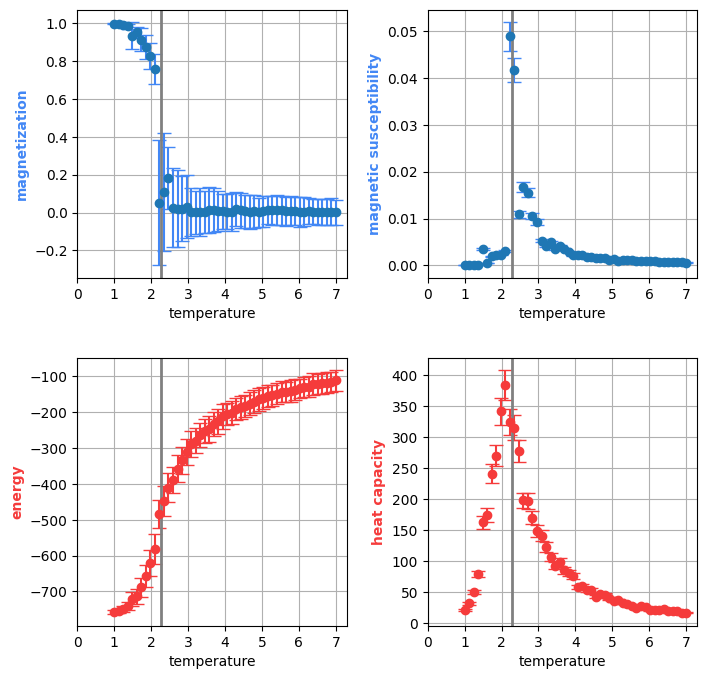

In [123]:
df.to_csv("outputs_csv/2d_scaling.csv")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

ax1.errorbar(df['temperature'], df['abs_magnetization'], yerr = df['std_magnetization'], fmt='o', ecolor=my_blue, capsize=5)
ax1.set_xlabel("temperature")
ax1.set_xticks(np.arange(0, 8))
ax1.set_xticklabels(np.arange(0, 8), fontsize = 10)
ax1.axvline(x = theoretical_critical_temperature, color='grey', linestyle='-', linewidth=2)
ax1.set_ylabel("magnetization", color = my_blue, fontweight='bold')
ax1.grid()

ax2.errorbar(df['temperature'], df['susceptibility'], yerr = df['std_susceptibility'], fmt='o', ecolor=my_blue, capsize=5)
ax2.set_xlabel("temperature")
ax2.set_xticks(np.arange(0, 8))
ax2.set_xticklabels(np.arange(0, 8), fontsize = 10)
ax2.axvline(x = theoretical_critical_temperature, color='grey', linestyle='-', linewidth=2)
ax2.set_ylabel("magnetic susceptibility", color = my_blue, fontweight='bold')
ax2.grid()

ax3.errorbar(df['temperature'], df['energy'], yerr = df['std_energy'], fmt='o', color = my_red, ecolor=my_red, capsize=5)
ax3.set_xlabel("temperature")
ax3.set_xticks(np.arange(0, 8))
ax3.set_xticklabels(np.arange(0, 8), fontsize = 10)
ax3.axvline(x = theoretical_critical_temperature, color='grey', linestyle='-', linewidth=2)
ax3.set_ylabel("energy", color = my_red, fontweight='bold')
ax3.grid()

ax4.errorbar(df['temperature'], df['heat'], yerr = df['std_heat'], fmt='o', color = my_red, ecolor= my_red, capsize=5)
ax4.set_xlabel("temperature")
ax4.set_xticks(np.arange(0, 8))
ax4.set_xticklabels(np.arange(0, 8), fontsize = 10)
ax4.axvline(x = theoretical_critical_temperature, color='grey', linestyle='-', linewidth=2)
ax4.set_ylabel("heat capacity", color = my_red, fontweight='bold')
ax4.grid()
plt.savefig("figures/2d_scaling.pdf")